# Dealing with missing values in dataset

In [77]:
import numpy as np
import pandas as pd
import missingno as msno
import sys
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
#from fancyimpute import KNN

#!{sys.executable} -m pip install fancyimpute 

In [48]:
None == None

True

In [3]:
np.nan == np.nan

False

In [4]:
np.isnan(np.nan)

True

In [5]:
type(np.nan)

float

In [6]:
type(None)

NoneType

In [7]:
try:
  # Print the sum of two None's
  print("Add operation output of 'None': ", None + None)

except TypeError:
  # Print if error
  print("'None' does not support Arithmetic Operations!!")

'None' does not support Arithmetic Operations!!


In [8]:
try:
  # Print the sum of two np.nan's
  print("Add operation output of 'np.nan': ", np.nan + np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support Arithmetic Operations!!")

Add operation output of 'np.nan':  nan


In [9]:
try:
  # Print the output of logical OR of two None's
  print("OR operation output of 'None': ", None or None)

except TypeError:
  # Print if error
  print("'None' does not support Logical Operations!!")

OR operation output of 'None':  None


In [10]:
try:
  # Print the output of logical OR of two np.nan's
  print("OR operation output of 'np.nan': ", np.nan or np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support Logical Operations!!")

OR operation output of 'np.nan':  nan


In [11]:
try:
  # Print the comparison of two 'None's
  print("'None' comparison output: ", None == None)

except TypeError:
  # Print if error
  print("'None' does not support this operation!!")

'None' comparison output:  True


In [12]:
try:
  # Print the comparison of two 'np.nan's
  print("'np.nan' comparison output: ", np.nan == np.nan)

except TypeError:
  # Print if error  
  print("'np.nan' does not support this operation!!")

'np.nan' comparison output:  False


In [13]:
try:
  # Check if 'None' is 'NaN'
  print("Is 'None' same as nan? ", np.isnan(None))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")

Function 'np.isnan()' does not support this Type!!


In [14]:
try:
  # Check if 'np.nan' is 'NaN'
  print("Is 'np.nan' same as nan? ", np.isnan(np.nan))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")

Is 'np.nan' same as nan?  True


In [37]:
dataset = pd.read_csv('CSV/air-quality.csv.xls',parse_dates=['Date'],index_col='Date')
dataset

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56
...,...,...,...,...
1976-09-26,30.0,193.0,6.9,70
1976-09-27,NaN,145.0,13.2,77
1976-09-28,14.0,191.0,14.3,75


In [25]:
print('How much there are missing values?: ')
dataset.isnull().sum()

How much there are missing values?: 


Date      0
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    153 non-null    object 
 1   Ozone   116 non-null    float64
 2   Solar   146 non-null    float64
 3   Wind    153 non-null    float64
 4   Temp    153 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 6.1+ KB


<AxesSubplot:>

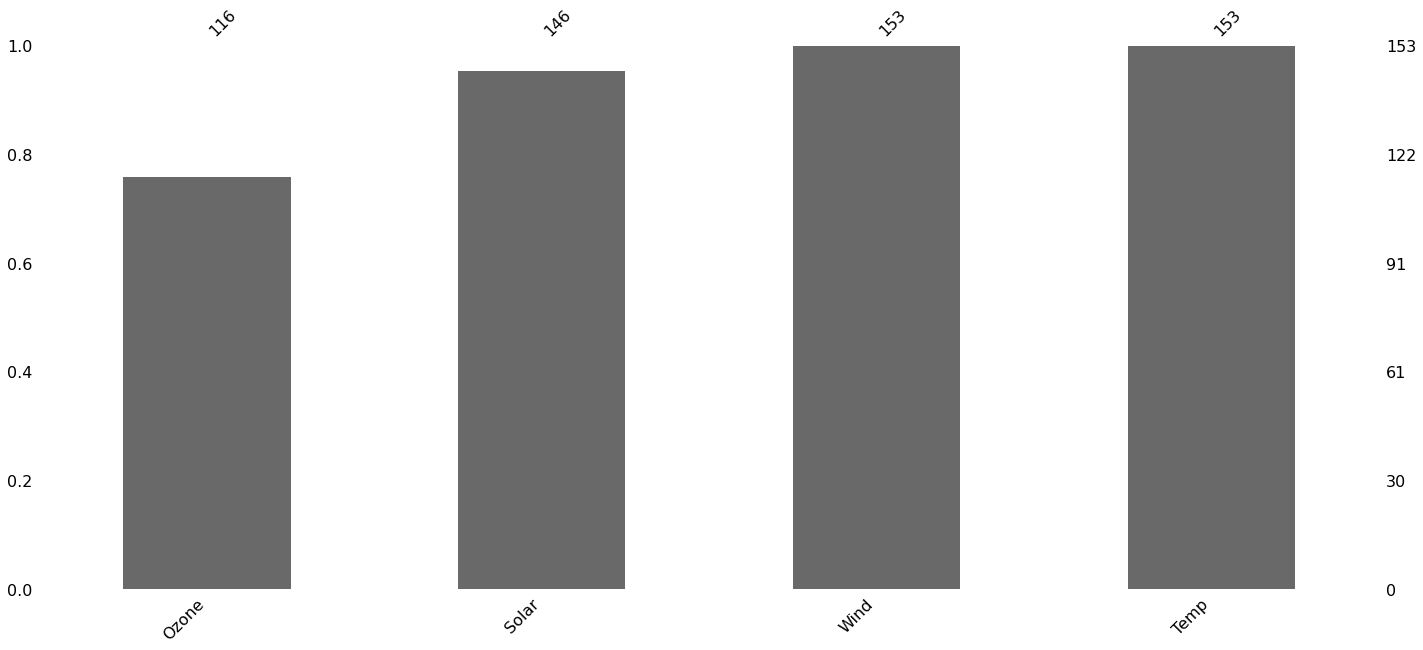

In [31]:
msno.bar(dataset.loc[:,'Ozone':])

<AxesSubplot:>

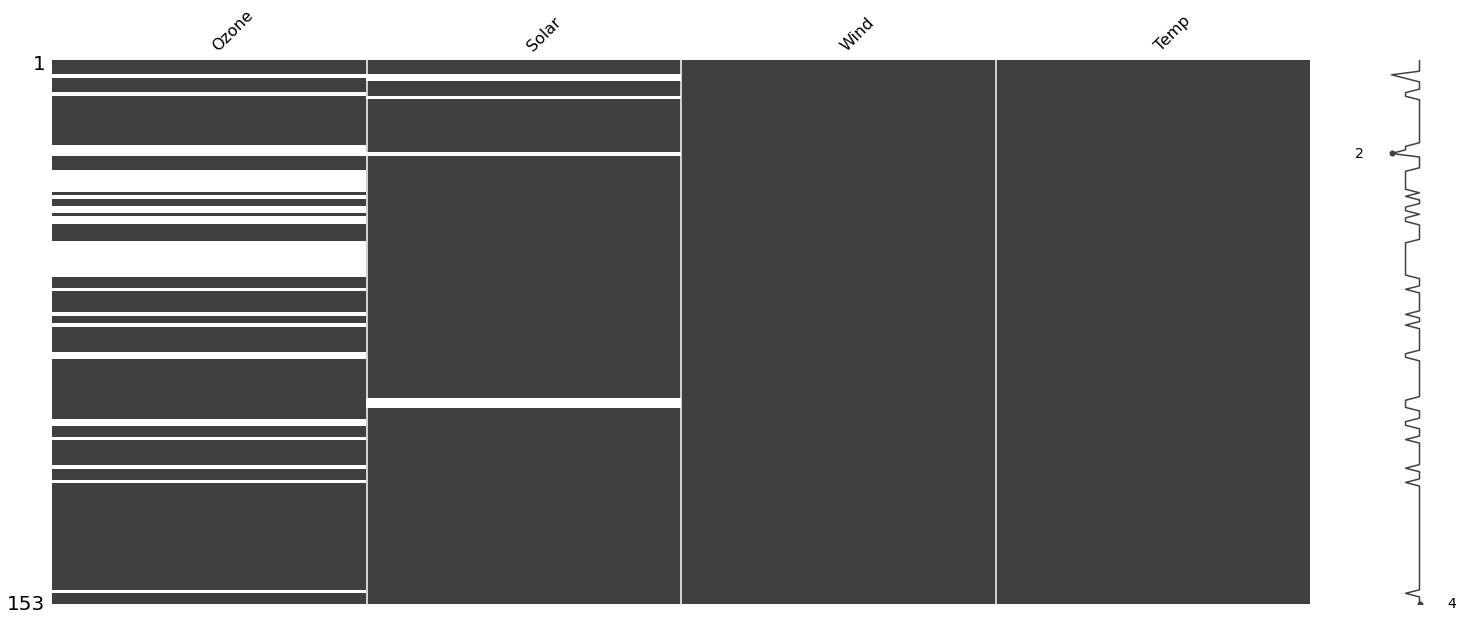

In [32]:
msno.matrix(dataset.loc[:,'Ozone':])

<AxesSubplot:>

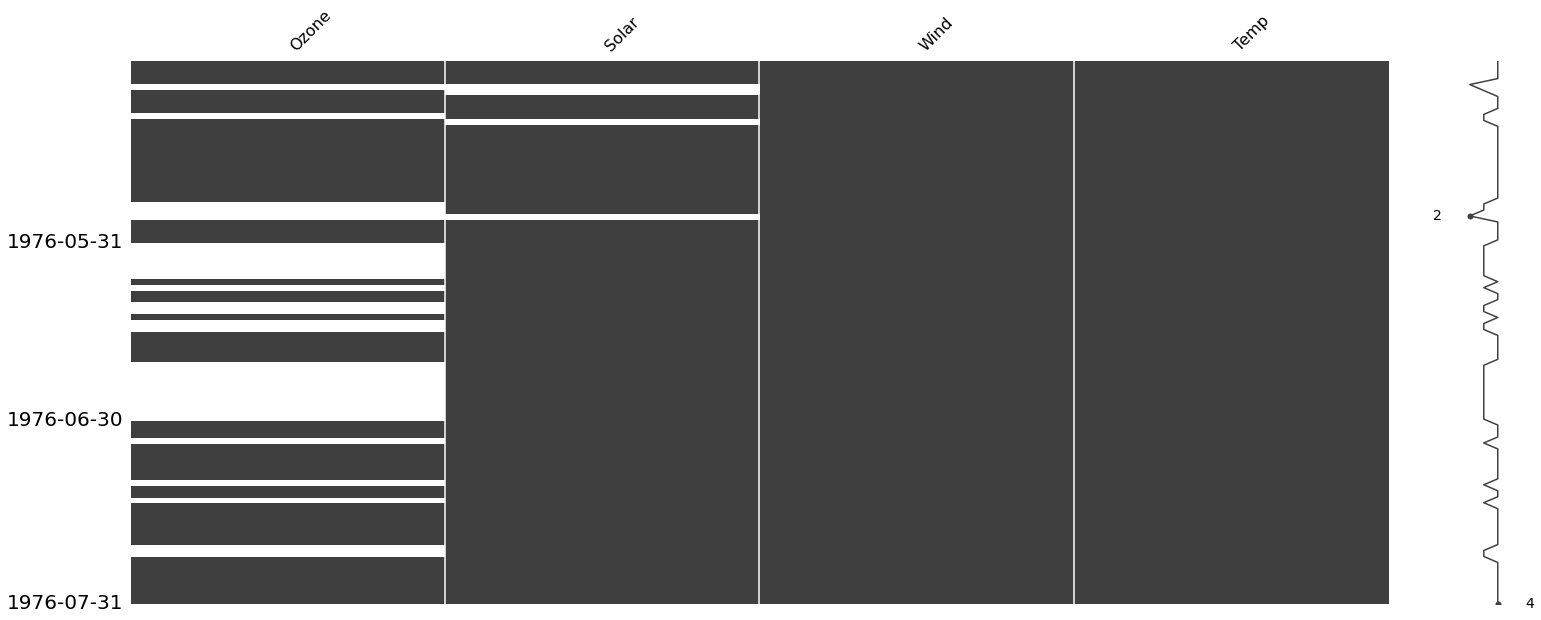

In [38]:
msno.matrix(dataset.loc['May-1976':'Jul-1976'],freq='M')

In [41]:
diabetes = pd.read_csv('CSV/pima-indians-diabetes data.csv.xls')
diabetes

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0


<AxesSubplot:>

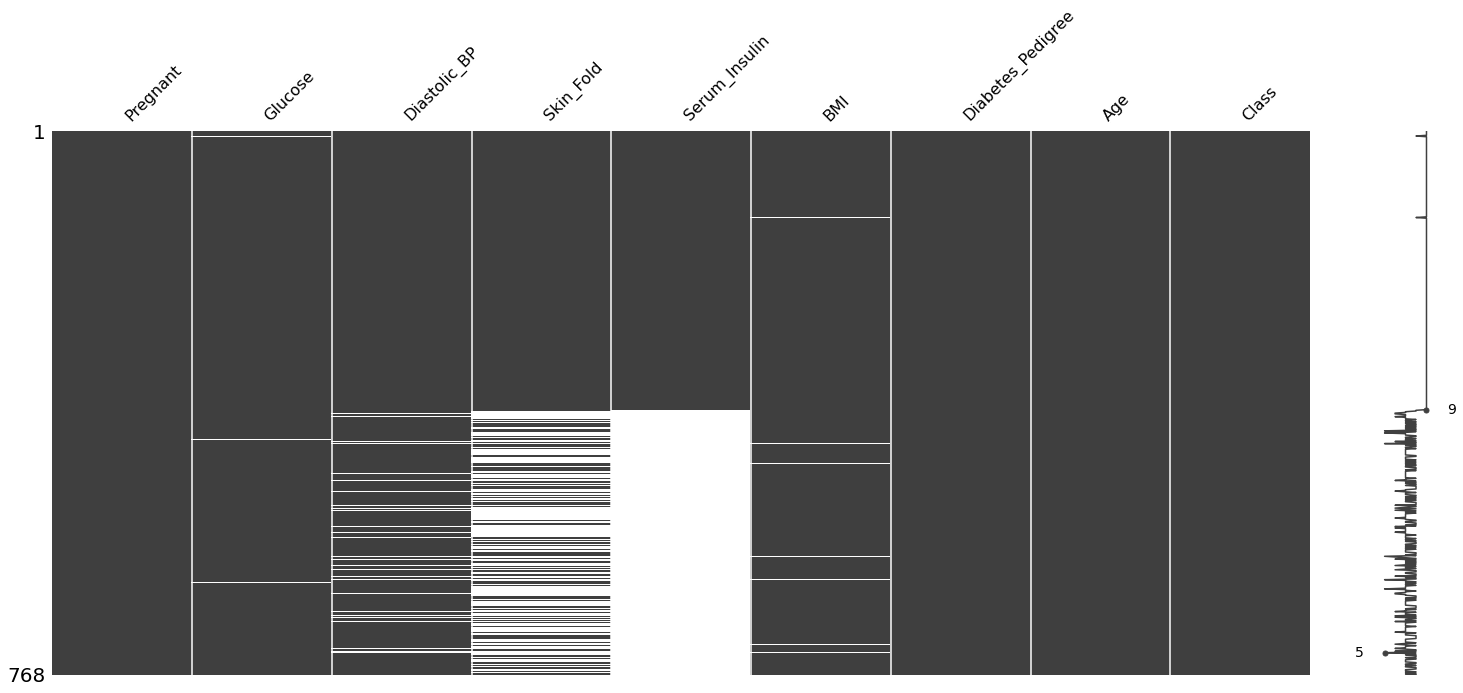

In [42]:
msno.matrix(diabetes.sort_values('Serum_Insulin'))

<AxesSubplot:>

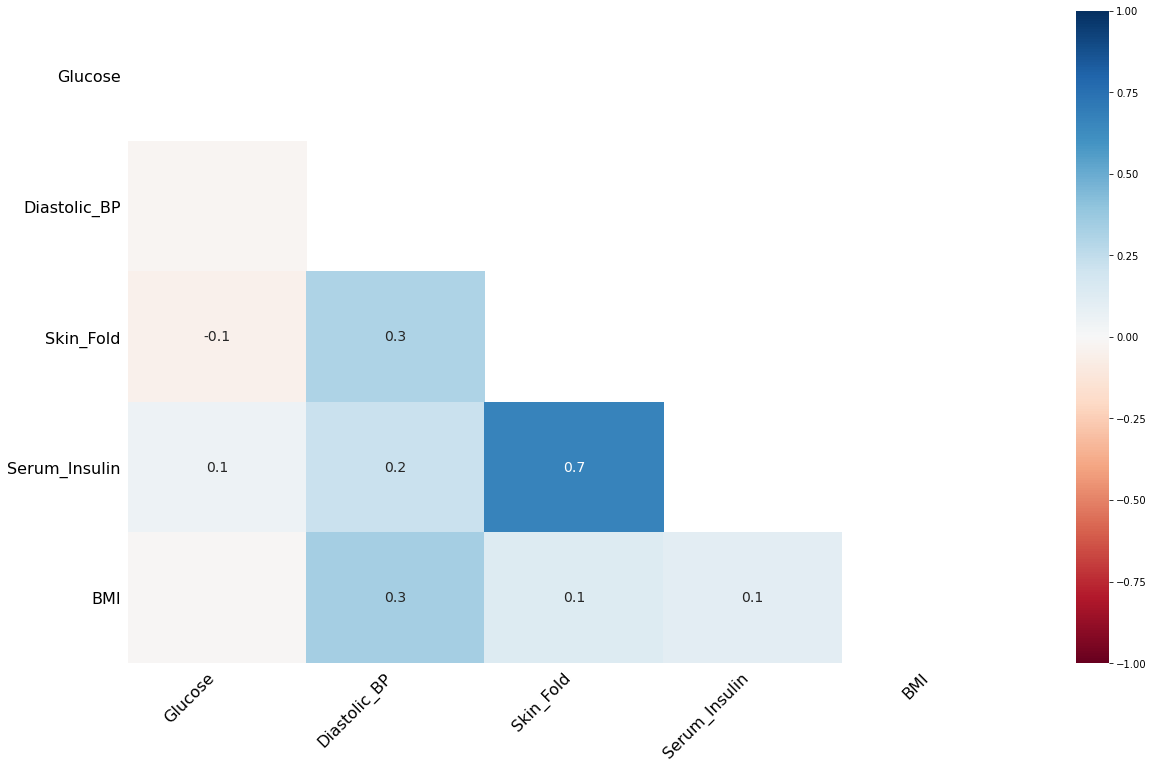

In [43]:
msno.heatmap(diabetes)

<AxesSubplot:>

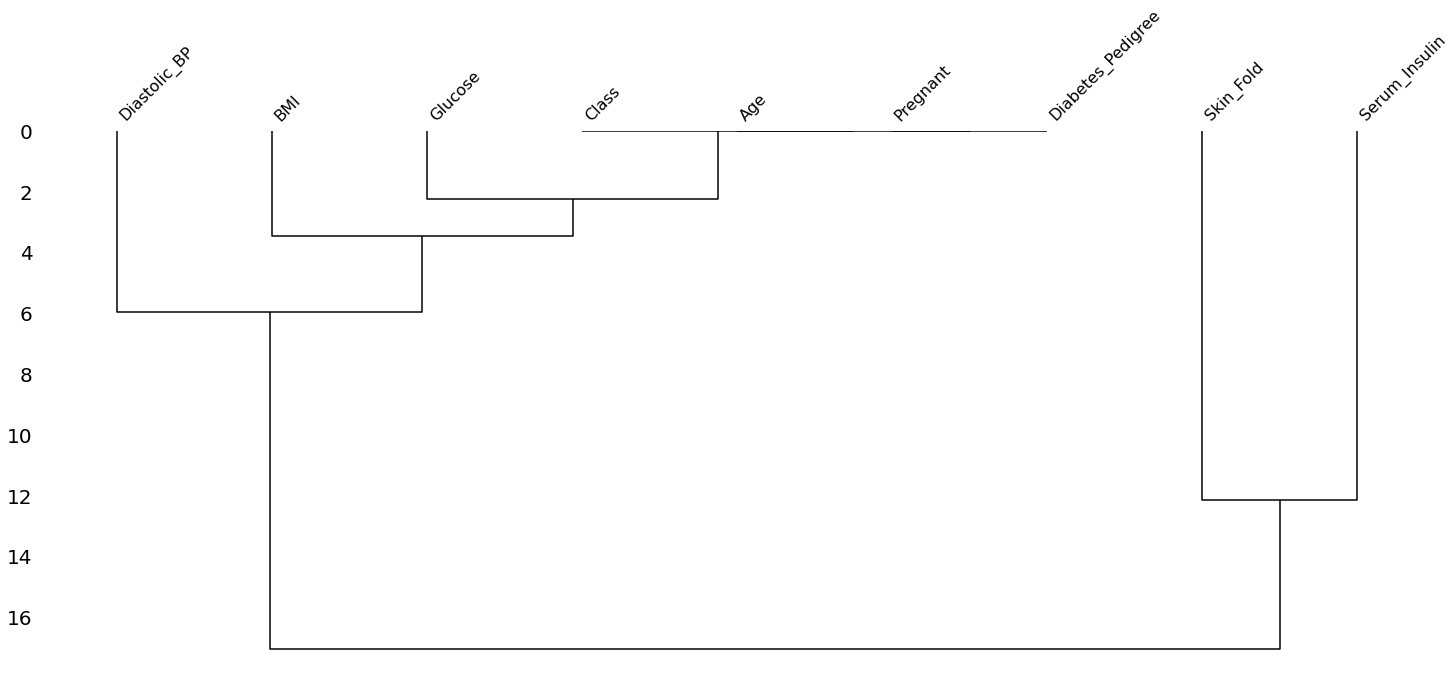

In [44]:
msno.dendrogram(diabetes)

In [45]:
def fill_dummy_values(df, scaling_factor=0.075):
    df_dummy = df.copy(deep=True)
    for col_name in df_dummy:
        col = df_dummy[col_name]
        col_null = col.isnull()    
        # Calculate number of missing values in column 
        num_nulls = col_null.sum()
        # Calculate column range
        col_range = col.max() - col.min()
        # Scale the random values to scaling_factor times col_range
        dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
        col[col_null] = dummy_values
    return df_dummy

<ipython-input-45-f6b6fbc2a7c2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col_null] = dummy_values
/Users/Andrew/jupyter/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


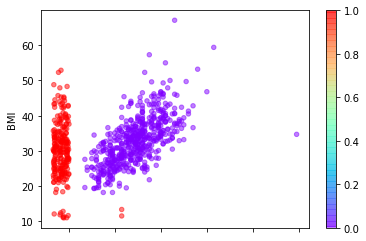

In [52]:
diabetes_dummy = fill_dummy_values(diabetes)

# Sum the nullity of Skin_Fold and BMI
nullity = diabetes.Skin_Fold.isnull() + diabetes.BMI.isnull()

# Create a scatter plot of Skin Fold and BMI 
diabetes_dummy.plot(x='Skin_Fold', y='BMI', kind='scatter', alpha=0.5, 
                    
                    # Set color to nullity of BMI and Skin_Fold
                    c=nullity, 
                    cmap='rainbow')

plt.show()

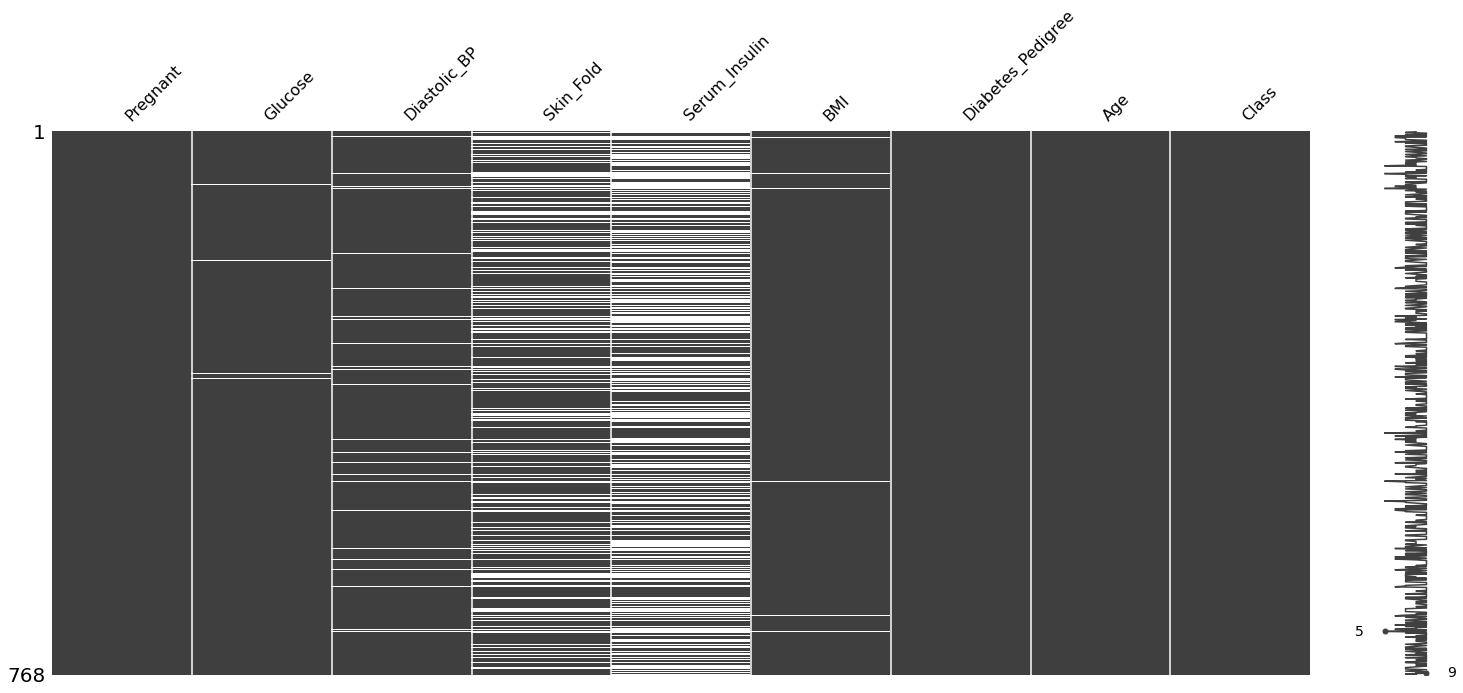

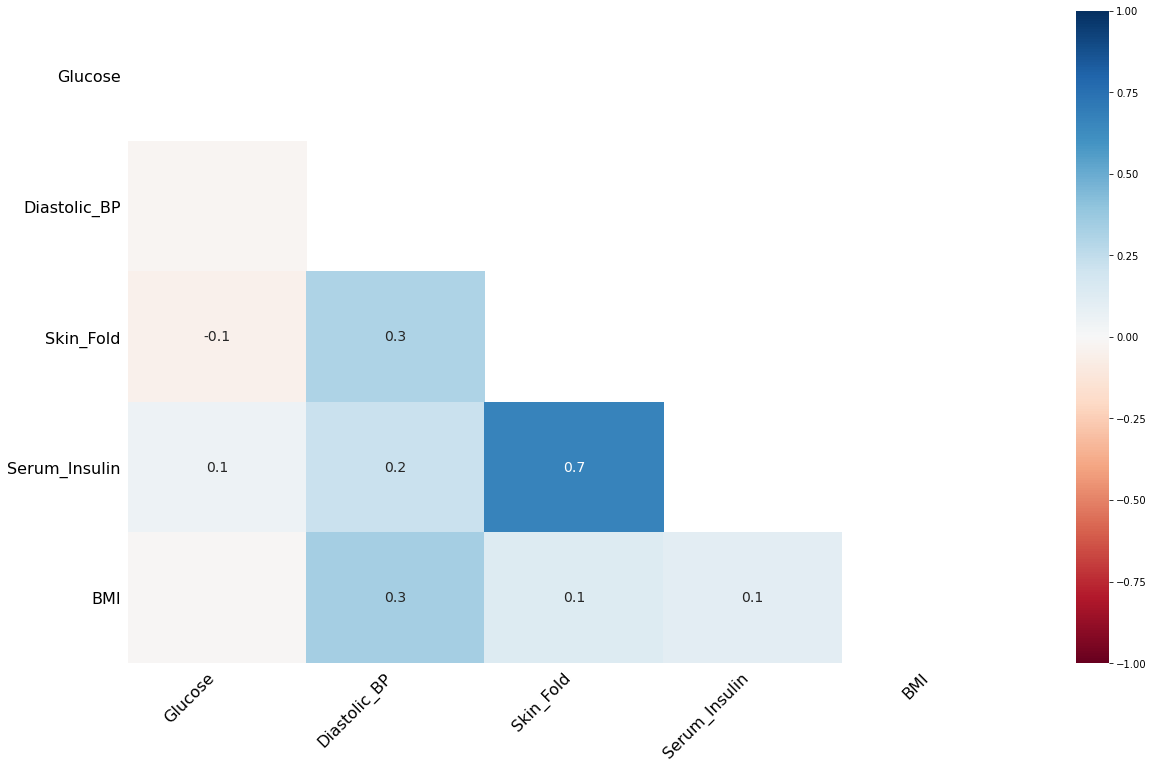

In [53]:
# Visualize the missingness in the data
msno.matrix(diabetes)

# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

# Drop rows where 'BMI' has a missing value
diabetes.dropna(subset=['BMI'], how='any', inplace=True)

In [80]:
# Make a copy of diabetes
diabetes_median = diabetes.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)
diabetes_median

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


In [57]:
# Make a copy of diabetes
diabetes_constant = diabetes.copy(deep=True)

# Create median imputer object
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)
diabetes_constant

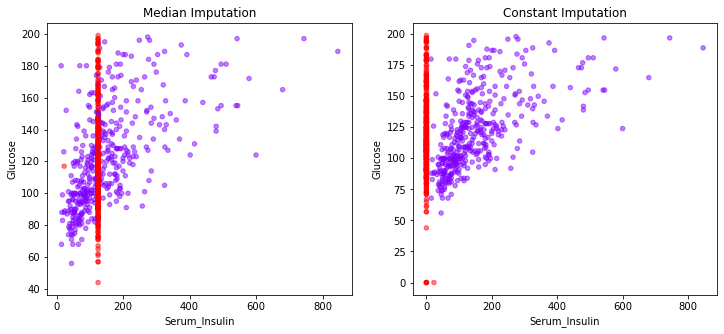

In [65]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))
nullity = diabetes.Serum_Insulin.isnull()+diabetes.Glucose.isnull()

# Create a dictionary of imputations
imputations = { 'Median Imputation': diabetes_median, 
                'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()

In [67]:
# Print prior to interpolation
print(dataset[30:40])

# Interpolate the NaNs with nearest value
dataset.interpolate(method='nearest',inplace=True)

# Print after interpolation
print(dataset[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01    NaN  286.0   8.6    78
1976-06-02    NaN  287.0   9.7    74
1976-06-03    NaN  242.0  16.1    67
1976-06-04    NaN  186.0   9.2    84
1976-06-05    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08    NaN  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90
            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01   37.0  286.0   8.6    78
1976-06-02   37.0  287.0   9.7    74
1976-06-03   37.0  242.0  16.1    67
1976-06-04   29.0  186.0   9.2    84
1976-06-05   29.0  220.0   8.6    85
1976-06-06   29.0  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08   29.0  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90


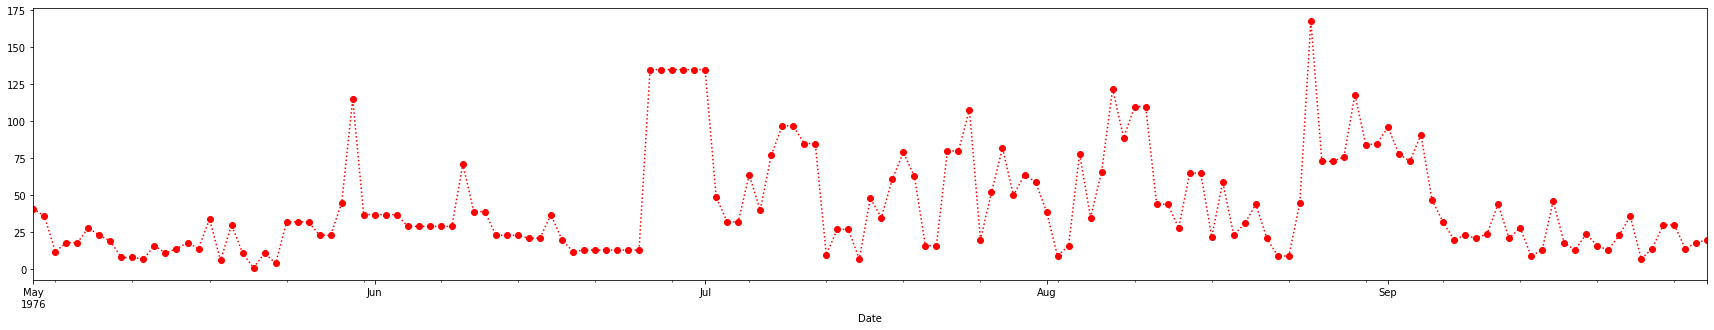

In [79]:
# Impute DataFrame with ffill method
ffill_imputed = dataset.fillna(method='ffill')

# Plot the imputed DataFrame
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

plt.show()